In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [30]:
train = pd.read_csv("C:/Users/USER/Desktop/data/train.csv")

print(train.shape)
train.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [31]:
test = pd.read_csv("C:/Users/USER/Desktop/data/test.csv")

print(test.shape)
test.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,0
3,3.jpg,0
4,4.jpg,1


## Load Images

In [32]:
# from matplotlib.pyplot import imread
from scipy.ndimage import imread

def load_images(filenames, default_path):
    images = []

    for filename in filenames:
        filepath = default_path + filename

        image = imread(filepath)
        images.append(image)

    images = np.array(images)

    return images

In [33]:
X_train = load_images(train["filename"], "C:/Users/USER/Desktop/data/train/")
X_train.shape

(2000,)

In [34]:
X_test = load_images(test["filename"], "C:/Users/USER/Desktop/data/test/")
X_test.shape

(2000,)

In [35]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

(2000,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [36]:
y_test = test["target"].values

print(y_test.shape)
y_test[0:10]

(2000,)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

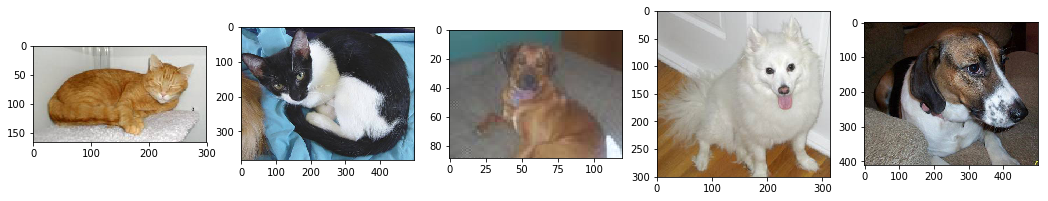

In [37]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train[0])
axes[1].imshow(X_train[1])
axes[2].imshow(X_train[2])
axes[3].imshow(X_train[3])
axes[4].imshow(X_train[4])

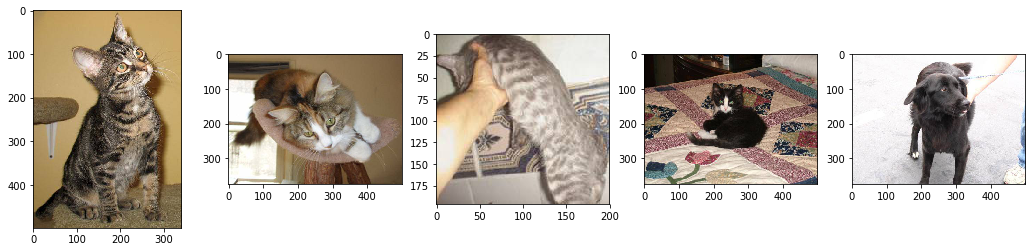

In [38]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test[0])
axes[1].imshow(X_test[1])
axes[2].imshow(X_test[2])
axes[3].imshow(X_test[3])
axes[4].imshow(X_test[4])

## Preprocessing

### Resize Images

In [39]:
from tqdm import tqdm
from scipy.misc import imresize

def resize_image(original_images, size):
    resized_images = []
    
    for original_image in tqdm(original_images):
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    
    return resized_images

In [40]:
X_train_224 = resize_image(X_train, (224, 224))
X_train_224.shape

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 516.77it/s]


(2000, 224, 224, 3)

In [41]:
X_test_224 = resize_image(X_test, (224, 224))
X_test_224.shape

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 523.90it/s]


(2000, 224, 224, 3)

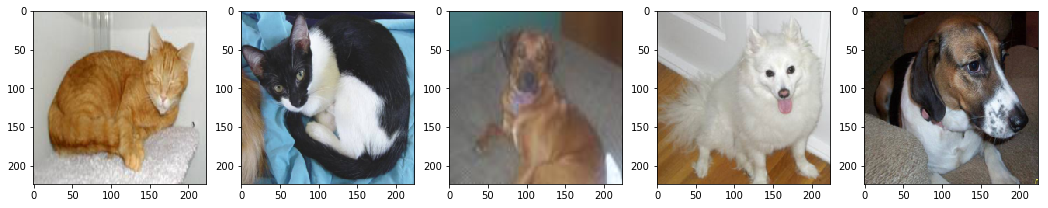

In [42]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train_224[0])
axes[1].imshow(X_train_224[1])
axes[2].imshow(X_train_224[2])
axes[3].imshow(X_train_224[3])
axes[4].imshow(X_train_224[4])

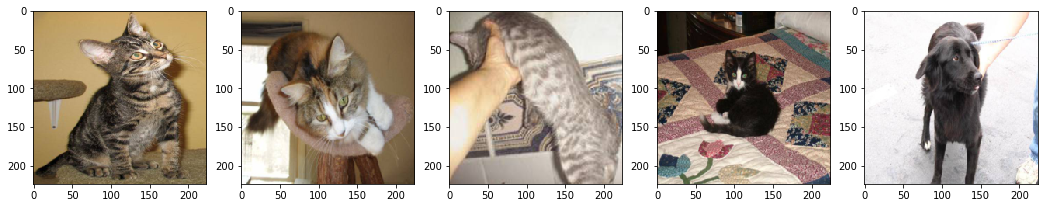

In [43]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test_224[0])
axes[1].imshow(X_test_224[1])
axes[2].imshow(X_test_224[2])
axes[3].imshow(X_test_224[3])
axes[4].imshow(X_test_224[4])

## Build a Model

### Tiny CNN Model

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_initializer='he_uniform', bias_initializer='zeros', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_initializer='he_uniform', bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_initializer='he_uniform', bias_initializer='zeros'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_initializer='he_uniform', bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu',
                kernel_initializer='he_uniform', bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',
                kernel_initializer='glorot_uniform', bias_initializer='zeros'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
__________

In [45]:
from keras.optimizers import SGD

optimizer = SGD(lr=0.000001)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(X_train_224, y_train, epochs=10)

Epoch 1/10
2000/2000 [==============================] - ETA: 4:15 - loss: 9.0664 - acc: 0.437 - ETA: 3:55 - loss: 8.0590 - acc: 0.500 - ETA: 3:47 - loss: 8.2269 - acc: 0.489 - ETA: 3:42 - loss: 8.3109 - acc: 0.484 - ETA: 3:36 - loss: 7.9583 - acc: 0.506 - ETA: 3:33 - loss: 8.2269 - acc: 0.489 - ETA: 3:29 - loss: 8.3469 - acc: 0.482 - ETA: 3:25 - loss: 8.1220 - acc: 0.496 - ETA: 3:22 - loss: 7.9471 - acc: 0.506 - ETA: 3:18 - loss: 7.9583 - acc: 0.506 - ETA: 3:13 - loss: 7.8759 - acc: 0.511 - ETA: 3:09 - loss: 8.0254 - acc: 0.500 - ETA: 3:05 - loss: 8.0667 - acc: 0.497 - ETA: 3:01 - loss: 8.1021 - acc: 0.495 - ETA: 2:57 - loss: 8.2336 - acc: 0.487 - ETA: 2:54 - loss: 8.2227 - acc: 0.488 - ETA: 2:50 - loss: 8.0945 - acc: 0.496 - ETA: 2:46 - loss: 8.1767 - acc: 0.491 - ETA: 2:42 - loss: 8.0377 - acc: 0.500 - ETA: 2:38 - loss: 8.1395 - acc: 0.493 - ETA: 2:34 - loss: 8.1597 - acc: 0.492 - ETA: 2:31 - loss: 8.0992 - acc: 0.495 - ETA: 2:27 - loss: 8.0317 - acc: 0.500 - ETA: 2:23 - loss: 8.1571

2000/2000 [==============================] - ETA: 3:47 - loss: 10.5775 - acc: 0.34 - ETA: 3:43 - loss: 9.4128 - acc: 0.4062 - ETA: 3:39 - loss: 7.9546 - acc: 0.500 - ETA: 3:35 - loss: 8.2326 - acc: 0.484 - ETA: 3:31 - loss: 8.6008 - acc: 0.462 - ETA: 3:27 - loss: 8.3644 - acc: 0.474 - ETA: 3:24 - loss: 8.5366 - acc: 0.464 - ETA: 3:20 - loss: 8.1721 - acc: 0.484 - ETA: 3:17 - loss: 8.1595 - acc: 0.486 - ETA: 3:13 - loss: 8.3510 - acc: 0.475 - ETA: 3:09 - loss: 8.2686 - acc: 0.480 - ETA: 3:06 - loss: 8.3651 - acc: 0.474 - ETA: 3:02 - loss: 8.4578 - acc: 0.468 - ETA: 2:58 - loss: 8.4137 - acc: 0.471 - ETA: 2:55 - loss: 8.2893 - acc: 0.479 - ETA: 2:51 - loss: 8.2431 - acc: 0.482 - ETA: 2:47 - loss: 8.1431 - acc: 0.489 - ETA: 2:43 - loss: 8.1188 - acc: 0.489 - ETA: 2:40 - loss: 8.0362 - acc: 0.495 - ETA: 2:36 - loss: 8.0874 - acc: 0.492 - ETA: 2:32 - loss: 8.0621 - acc: 0.494 - ETA: 2:29 - loss: 8.0161 - acc: 0.497 - ETA: 2:25 - loss: 7.9961 - acc: 0.498 - ETA: 2:21 - loss: 7.9148 - acc: 0.

In [47]:
y_predict = model.predict(X_test_224)

y_predict = (y_predict >= 0.5).reshape(-1).astype('int')

accuracy = (y_predict == y_test).mean()

print("Accuracy = {0:.5f}".format(accuracy))

Accuracy = 0.49600


### VGG-16 w/ Pre-trained Model

In [19]:
!pip install h5py

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                 padding='same',trainable=False, input_shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu',
                 padding='same', trainable=False))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Load Weight from pre-trained model
model.load_weights("C:/Users/USER/Desktop/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

model.add(Flatten())
model.add(Dense(units=128, activation='relu',
                kernel_initializer='he_uniform', bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',
                kernel_initializer='glorot_uniform', bias_initializer='zeros'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 256)       295168    
__________

In [21]:
from keras.optimizers import SGD

optimizer = SGD(lr=1e-4, momentum=0.9)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(X_train_224, y_train, epochs=1)

Epoch 1/1
2000/2000 [==============================] - ETA: 10:34 - loss: 5.1121 - acc: 0.53 - ETA: 10:03 - loss: 5.2821 - acc: 0.54 - ETA: 9:44 - loss: 4.4532 - acc: 0.6042 - ETA: 9:29 - loss: 4.6763 - acc: 0.593 - ETA: 9:21 - loss: 4.4441 - acc: 0.600 - ETA: 9:09 - loss: 3.8718 - acc: 0.640 - ETA: 9:04 - loss: 3.3759 - acc: 0.678 - ETA: 8:54 - loss: 3.1113 - acc: 0.695 - ETA: 8:43 - loss: 2.9403 - acc: 0.708 - ETA: 8:30 - loss: 2.8391 - acc: 0.718 - ETA: 8:19 - loss: 2.6312 - acc: 0.738 - ETA: 8:09 - loss: 2.5351 - acc: 0.750 - ETA: 7:59 - loss: 2.4031 - acc: 0.759 - ETA: 7:48 - loss: 2.2466 - acc: 0.772 - ETA: 7:38 - loss: 2.1702 - acc: 0.775 - ETA: 7:28 - loss: 2.0528 - acc: 0.787 - ETA: 7:17 - loss: 1.9696 - acc: 0.794 - ETA: 7:06 - loss: 1.8880 - acc: 0.803 - ETA: 6:56 - loss: 1.8679 - acc: 0.807 - ETA: 6:46 - loss: 1.7757 - acc: 0.815 - ETA: 6:36 - loss: 1.7858 - acc: 0.815 - ETA: 6:26 - loss: 1.7082 - acc: 0.822 - ETA: 6:16 - loss: 1.6487 - acc: 0.827 - ETA: 6:06 - loss: 1.6045

In [23]:
y_predict = model.predict(X_test_224)
y_predict = (y_predict > 0.5).reshape(-1).astype('int')

In [26]:
accuracy = (y_predict == y_test).mean()
print("Accuracy = {0:.5f}".format(accuracy))

Accuracy = 0.94800
